In [1]:
%matplotlib inline

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [3]:
plt.style.use('ggplot')

In [4]:
data_path = '../data'
summary_stats_filename = 'crossref-works-summaries-stat.tsv'
citations_stats_filename = 'crossref-works-citations-stat.tsv'
reference_stats_filename = 'crossref-works-reference-stat.tsv.gz'

In [5]:
df_summary = pd.read_csv(os.path.join(data_path, summary_stats_filename), sep='\t')
df_summary = df_summary.rename(columns={'Unnamed: 0': 'stat'}).set_index('stat')
df_summary

,doi,title,reference_count,referenced_by_count,created,type,publisher,container_title,author_count,first_subject_area,subject_areas,has_references,num_references,num_citations_without_doi,num_duplicate_citation_dois,cited_dois,provenance,debug
stat,,,,,,,,,,,,,,,,,,
count,93184372.0,89128522.0,9.318437e+07,9.318437e+07,93184372.0,93183607.0,93182360.0,88397826.0,7.731770e+07,58607144.0,58607144.0,9.318437e+07,9.318437e+07,9.318437e+07,9.318437e+07,93184372.0,93184372.0,93184372.0
count_non_zero,NaN,NaN,3.844524e+07,3.921046e+07,NaN,NaN,NaN,NaN,7.731770e+07,NaN,NaN,1.822864e+07,1.822864e+07,1.684190e+07,3.859240e+05,NaN,NaN,NaN
count_zero,NaN,NaN,5.473914e+07,5.397391e+07,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,7.495573e+07,7.495573e+07,7.634247e+07,9.279845e+07,NaN,NaN,NaN
max,NaN,NaN,2.581400e+04,1.291330e+05,NaN,NaN,NaN,NaN,9.148000e+03,NaN,NaN,1.000000e+00,7.034000e+03,6.307000e+03,1.335000e+03,NaN,NaN,NaN
mean,NaN,NaN,1.153770e+01,7.964879e+00,NaN,NaN,NaN,NaN,3.163217e+00,NaN,NaN,1.956190e-01,5.614687e+00,2.614254e+00,1.165767e-02,NaN,NaN,NaN
mean_non_zero,NaN,NaN,2.796533e+01,1.892868e+01,NaN,NaN,NaN,NaN,3.163217e+00,NaN,NaN,1.000000e+00,2.870215e+01,1.446438e+01,2.814837e+00,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
sum,NaN,NaN,1.075134e+09,7.422023e+08,NaN,NaN,NaN,NaN,2.445727e+08,NaN,NaN,1.822864e+07,5.232011e+08,2.436076e+08,1.086313e+06,NaN,NaN,NaN


In [6]:
df_citations = pd.read_csv(os.path.join(data_path, citations_stats_filename), sep='\t')
df_citations = df_citations.rename(columns={'Unnamed: 0': 'stat'}).set_index('stat')
boolean_str_to_int_map = {'True': '1', 'False': '0'}
print(df_citations['cited_doi_corrected']
    .map(lambda x: boolean_str_to_int_map.get(x, x)).values)
df_citations['cited_doi_corrected'] = pd.to_numeric(
    df_citations['cited_doi_corrected']
    .map(lambda x: boolean_str_to_int_map.get(x, x))
)
print(df_citations.dtypes)
df_citations

['357115084' '76562655' '280552429' '1' '0' '76562655']
citing_doi                             float64
cited_doi                              float64
original_cited_doi                     float64
cited_doi_valid                        float64
cited_doi_corrected                      int64
doi_corrected_equal_case_insensitve    float64
dtype: object


,citing_doi,cited_doi,original_cited_doi,cited_doi_valid,cited_doi_corrected,doi_corrected_equal_case_insensitve
stat,,,,,,
count,357115084.0,2.464016e+08,2.464016e+08,278504990.0,357115084,76562655.0
count_non_zero,NaN,6.830000e+02,6.830000e+02,278178058.0,76562655,76448579.0
count_zero,NaN,0.000000e+00,0.000000e+00,326932.0,280552429,114076.0
max,NaN,1.077630e+01,1.077630e+01,1.0,1,1.0
min,NaN,1.010017e+01,1.010017e+01,0.0,0,0.0
sum,NaN,6.928239e+03,6.928239e+03,278178058.0,76562655,76448579.0


In [7]:
df_summary['reference_count']['count']

93184372.0

In [8]:
def show_counts(counts, title='', number_format='{:,.0f}', **kwargs):
    if isinstance(counts, list):
        df = pd.DataFrame(counts, columns=['what', 'count']).set_index('what')
    else:
        df = counts
    format_count = lambda c: number_format.format(c)
    ax = df.plot(kind='bar', **kwargs)
    for p in ax.patches:
        ax.annotate(
            format_count(p.get_height()),
            xy=(p.get_x() + p.get_width() / 2, p.get_height()), xycoords="data",
            va="bottom", ha="center"
        )
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: format_count(y))) 
    ax.axes.get_xaxis().set_label_text(title)
    ax.margins(y=0.2)

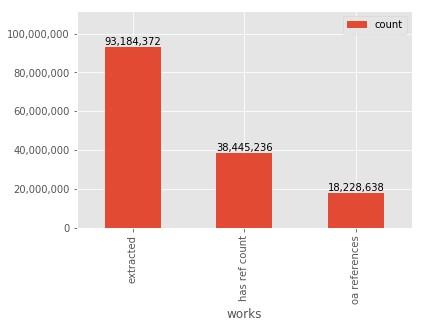

In [9]:
show_counts([
    ['extracted', df_summary['has_references']['count']],
    ['has ref count', df_summary['reference_count']['count_non_zero']],
    ['oa references', df_summary['has_references']['count_non_zero']]
], 'works')

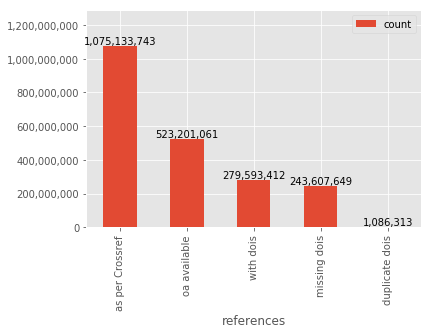

In [10]:
show_counts([
    ['as per Crossref', df_summary['reference_count']['sum']],
    ['oa available', df_summary['num_references']['sum']],
    ['with dois', df_summary['num_references']['sum'] - df_summary['num_citations_without_doi']['sum']],
    ['missing dois', df_summary['num_citations_without_doi']['sum']],
    ['duplicate dois', df_summary['num_duplicate_citation_dois']['sum']]
], 'references')

num_cited_doi_not_corrected: 280552429
num_corrected_doi_same_case_insensitve: 76448579


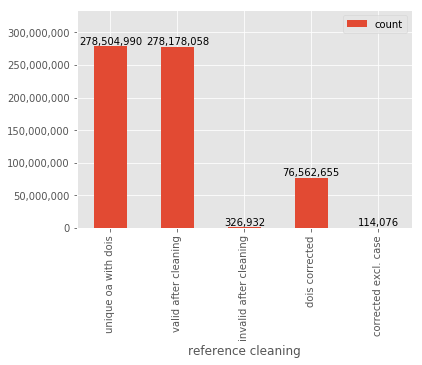

In [ ]:
num_unique_oa_with_dois = df_citations['cited_doi_valid']['count']
num_cited_doi_corrected = df_citations['cited_doi_corrected']['count_non_zero']
num_cited_doi_not_corrected = df_citations['cited_doi_corrected']['count_zero']
#num_doi_same_case_insensitve = df_citations['doi_same_case_insensitve']['count_non_zero']
num_corrected_doi_same_case_insensitve = int(df_citations['doi_corrected_equal_case_insensitve']['count_non_zero'])
print('num_cited_doi_not_corrected:', num_cited_doi_not_corrected)
print('num_corrected_doi_same_case_insensitve:', num_corrected_doi_same_case_insensitve)
show_counts([
    ['unique oa with dois', num_unique_oa_with_dois],
    ['valid after cleaning', df_citations['cited_doi_valid']['count_non_zero']],
    ['invalid after cleaning', num_unique_oa_with_dois - df_citations['cited_doi_valid']['count_non_zero']],
    ['dois corrected', df_citations['cited_doi_corrected']['count_non_zero']],
    ['corrected excl. case', (
        num_cited_doi_corrected - num_corrected_doi_same_case_insensitve
    )]
], 'reference cleaning')

In [ ]:
df_reference_stat = pd.read_csv(os.path.join(data_path, reference_stats_filename), sep='\t')
df_reference_stat['examples'] = df_reference_stat['examples'].map(lambda x: json.loads(x))
df_reference_stat['examples_without_source'] = df_reference_stat['examples'].map(lambda x: [y[1] for y in x])
df_reference_stat = df_reference_stat.sort_values('count', ascending=False)
df_reference_stat.drop('examples', axis=1).head(10)

In [ ]:
set(df_reference_stat['type'].values)

In [ ]:
df_reference_key_combination_stat = (
    df_reference_stat[df_reference_stat['type'] == 'key_combination']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_reference_key_combination_stat['count'].head(10), figsize=(20, 4))

In [ ]:
df_reference_year_stat = (
    df_reference_stat[df_reference_stat['type'] == 'year']
    .drop('type', axis=1)
    .sort_values('key', ascending=False)
    .set_index('key')
)
df_reference_year_stat = df_reference_year_stat[df_reference_year_stat['count'] > 1000]
show_counts(df_reference_year_stat['count'].head(150), figsize=(20, 4))

In [ ]:
df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref-publisher']
    .drop('type', axis=1)
    .set_index('key')
)

df_temp_total = (
    df_reference_stat[df_reference_stat['type'] == 'total_publisher']
    .drop('type', axis=1)
    .set_index('key')
)
# print(df_temp_total.head())
print((df_temp['count'].head(10) / df_temp_total['count']).dropna())
show_counts(df_temp['count'].head(10), figsize=(20, 4))

In [ ]:
df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref-publisher']
    .drop('type', axis=1)
    .set_index('key')
)
df_temp2 = (
    df_reference_stat[df_reference_stat['type'] == 'total_publisher']
    .drop('type', axis=1)
    .set_index('key')
)
# df_temp = df_temp[df_temp['count'] > 100000]
# df_temp = df_temp[df_temp2['count'] > 10000]
# df_temp2 = df_temp2[df_temp2['count'] > 10000]
df_temp3 = df_temp.copy()
df_temp3['count'] = df_temp3['count'] / df_temp2['count']
print(df_temp3['count'].sort_values(ascending=False).head())
show_counts(df_temp3['count'].sort_values(ascending=False).head(10), number_format='{:,.5f}', figsize=(20, 4))

In [ ]:
df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref-countainer_title']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_temp['count'].head(10), figsize=(20, 4))

In [ ]:
df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref-first_subject_area']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_temp['count'].head(10), figsize=(20, 4))

In [ ]:
df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref-created']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_temp['count'].head(10), figsize=(20, 4))